<a href="https://colab.research.google.com/github/SirichaiKhomleart/cognitive-systems-for-health-technology-applications/blob/master/Case_1_Coronary_Heart_Disease_(Sirichai_and_Puttiwat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 1. Coronary Heart Disease
Mr.Sirichai Khomleart<br>
Mr.Puttiwat Wanna<br>
Last edited: 03.02.2018<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

This case study aims for objectives as following
- Learn to read data from external sources using pandas’ read_csv -function
- Use keras’ neural networks to make an expert system to support in diagnostic decision
making
- Learn to test model architectures (number of layers, number of units, activation functions), solver optimizers and training settings (epochs, batch sizes, validation splits) 
- Learn to use matplotlib’s visualization tools to make graphical presentations of the training and validation results
- Learn to document the results clearly and in easily readable format
- Learn to perform methods to improve accuracy of model. For example, optimizer, regularizeation function, drop out, etc
- Learn to perform features selection and its methods like Gini coefficient and correlation coefficient
- Learn to implement cross validation to model and validate its accuracy

## 2. Required libraries

In [0]:
#Required libraries for this case study

#basic libraries
%pylab inline
import time
import warnings
warnings.filterwarnings("ignore") #Disable warnings
import pandas as pd
import numpy as np
from numpy import corrcoef #Calculate correlation coefficient
from numpy import array
import matplotlib.pyplot as plt #Visual graphs
import seaborn as sns 
import pandas as pd

#urllib libraries
import urllib
from urllib.request import urlopen #Get data from UCI Machine Learning Repository

#sklearn libraries
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier #Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier #Decision Trees
from sklearn.tree import export_graphviz #Extract Decision Tree visual
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #SVM
from sklearn.metrics import roc_curve #ROC Curves
from sklearn.metrics import auc #AUC 
from sklearn.model_selection import KFold, cross_val_score #cross validation 
from sklearn.utils import shuffle #shuffle dataset
from sklearn.preprocessing import normalize #normalize dataset
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support #calculate scores

#keras libraries
from keras.utils import to_categorical
from keras import models, layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.regularizers import l1 #for regularization

#plotly libraries (for interaction graph)
import plotly.plotly as py
import plotly.tools as pt
import plotly.graph_objs as go
#sign-in to plotly
py.sign_in(username="sirichaik",api_key="DyRcn9ej8cuM4RfE4m7n")
pt.set_credentials_file(username='sirichaik', api_key='DyRcn9ej8cuM4RfE4m7n')
plt.style.use('ggplot')
#---- note ------------------------------------------------------------------------
#If there are errors occurred during running code, 
#please contact me at sirichai.khomleart@gmail.com.
#Plotly free account only allow user to have up to 25 stored-graphs.
#Error might come from my account already use all 25 slot to plot the graphs.
#----------------------------------------------------------------------------------

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## 3. Data description and preprocessing

Throughout this case study, we used the data files from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ .

At the very first of the study, we implemented only data from **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation** collected and preprocessed by *Robert Detrano, M.D., Ph.D. *(filename: 	**processed.cleveland.data**) to have an overall image and know the basic accuracy result from our intial version of the model.

The file **processed.cleveland.data** contained preprocessed dataset used to build the model for predicting the Coronary Heart Disease. There are 303 data records and each record has **14 features **available for use as follows.



1.   **age**: age in years
2.   **sex**: sex (1 = male; 0 = female)
3.   **cp**: chest pain type (1 =  typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4.   **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5.   **chol**: serum cholestoral in mg/dl
6.   **fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.   **thalach**: maximum heart rate achieved
9.   **exang**: exercise induced angina (1 = yes; 0 = no)
10.   **oldpeak** = ST depression induced by exercise relative to rest
11.   **slope**: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12.   **ca**: number of major vessels (0-3) colored by flourosopy
13.   **thal**: (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.   **num**: diagnosis of heart disease (angiographic disease status) (0 = < 50% diameter narrowing; 1 = > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels))

Note that:
*   Missing Attribute Values: Several. Distinguished with value -9.0.
*   **"num"** column will be denoted as **"heartdisease"** for easier undersatnding
*  This case study will predict the coronary heart disease in binary prediction (0 = no coronary heart disease detected; 1 = coronary heart disease detected)
*  Distribution of class in data is 0 = 164 records; 1 = 55 records, 2 = 36 records, 3 = 35 records, 4 = 13 records. Totally, 303 records.



### Import data

---



In [0]:
#import data
#define url for processed.cleveland.data
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
#define labels
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
# read csv
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names,na_values = '?') #gets Cleveland data

In [0]:
#print check data
np.set_printoptions(threshold=np.nan) #see a whole array when we output it
ClevelandHeartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
#print description of data
ClevelandHeartDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Later on, in order to increase an accuracy of our model, we also implemented processed data from **University Hospital, Zurich, Switzerland** collected by *William Steinbrunn, M.D.* (filename: **processed.hungarian.data**) and processed data from **Hungarian Institute of Cardiology. Budapest** collected by *Andras Janosi, M.D.* (filename: **processed.switzerland.data**).
<br>
<br>The structure of data is the same as that in the Cleveland data file, but the Hungarian file has 294 records (distribution of class is: 0 = 188 records; 1 = 37 records, 2 = 26 records, 3 = 28 records, 4 = 15 records) and the Switzerland file has 123 records (distribution of class is: 0 = 8 records; 1 = 48 records, 2 = 32 records, 3 = 30 records, 4 = 5 records).

In [0]:
#import data
#define url
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
#read csv
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names,na_values = '?') #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names,na_values = '?') #gets Switzerland data
#merge dataset
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease] #combines all arrays into a list
heartDisease = pd.concat(datatemp)#combines list into one array

In [0]:
#print check data
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
#print description of data
heartDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,720.000000,720.000000,720.000000,717.000000,697.000000,637.000000,718.000000,718.000000,718.000000,714.000000,513.000000,307.000000,400.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,204.774749,0.109890,0.568245,140.565460,0.337047,0.789636,1.701754,0.680782,4.985000,0.850000
std,9.193720,0.439546,0.953646,18.529331,109.275156,0.312999,0.833534,25.647172,0.473031,1.066961,0.585249,0.937101,1.929789,1.076878
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000,0.000000,6.000000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


###Preprocess data

---


- From the description table above, you can see that when we merge three datasets together, there are a lot of missing field in the features "**slope**", "**ca**", and "**thal**". 
<br>Generally, we can fill up missing field by using an average value or a zero value. 
<br>However, in this case, since there are almost half of data missing, filling up the missing fields by using random values might not help improve an accuracy of our model, but instead, may result in lower accuracy. Therefore, we decided to remove these three features from the dataset we used to train a model.
- For other missing values, we decided to fill them with the **median** value of that feature.

In [0]:
#delete three features
del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']
#fill missing value with median value
heartDisease = heartDisease.fillna(heartDisease.median())


In [0]:
#print check data
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


In [0]:
#print description of data
heartDisease.describe()
#you can see that no more missing data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,131.797222,205.484722,0.097222,0.566667,140.569444,0.336111,0.784722,0.850000
std,9.193720,0.439546,0.953646,18.491000,107.584271,0.296466,0.832911,25.611588,0.472706,1.063853,1.076878
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,184.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


In [0]:
#do the same for Cleveland dataset only
del ClevelandHeartDisease['ca']
del ClevelandHeartDisease['slope']
del ClevelandHeartDisease['thal']
#fill missing value with median value
ClevelandHeartDisease = ClevelandHeartDisease.fillna(ClevelandHeartDisease.median())

###Class Imbalance

---


Next problem is the imbalance of the class heart disease. 
<br>In the following code result, you will see an imbalance of the dataset that we merged from three sources. 
<br>It can be solved by changing from a multi-classification model to a binary classification model.
<br>This will reduce the possible outcome from 5 to 2 but will dramatically improve the balance of the class label.

In [0]:
#check imbalance of the class heart disease
item_0 = 0
item_1 = 0
item_2 = 0
item_3 = 0
item_4 = 0
for item_i in heartDisease['heartdisease']:
  if (item_i == 0):
    item_0 +=1
  if (item_i == 1):
    item_1 +=1
  if (item_i == 2):
    item_2 +=1
  if (item_i == 3): 
    item_3 +=1
  if (item_i == 4):
    item_4 +=1
heartDisease_0 = (item_0/len(heartDisease)) * 100
print("The percentage of level 0 in the response variable is: {0:.2f}".format(heartDisease_0)) 
heartDisease_1 = (item_1/len(heartDisease)) * 100
print("The percentage of level 1 in the response variable is: {0:.2f}".format(heartDisease_1)) 
heartDisease_2 = (item_2/len(heartDisease)) * 100
print("The percentage of level 2 in the response variable is: {0:.2f}".format(heartDisease_2)) 
heartDisease_3 = (item_3/len(heartDisease)) * 100
print("The percentage of level 3 in the response variable is: {0:.2f}".format(heartDisease_3)) 
heartDisease_4 = (item_4/len(heartDisease)) * 100
print("The percentage of level 4 in the response variable is: {0:.2f}".format(heartDisease_4)) 

The percentage of level 0 in the response variable is: 50.00
The percentage of level 1 in the response variable is: 29.03
The percentage of level 2 in the response variable is: 9.44
The percentage of level 3 in the response variable is: 9.03
The percentage of level 4 in the response variable is: 2.50


In [0]:
#change to binary classification
for i in range(1,5):
    heartDisease['heartdisease'] = heartDisease['heartdisease'].replace(i,1)

In [0]:
#check imbalance of the class heart disease
item_0 = 0
item_1 = 0
for item_i in heartDisease['heartdisease']:
  if (item_i == 0):
    item_0 +=1
  if (item_i == 1):
    item_1 +=1
heartDisease_0 = (item_0/len(heartDisease)) * 100
print("The percentage of level 0 in the response variable is: {0:.2f}".format(heartDisease_0)) 
heartDisease_1 = (item_1/len(heartDisease)) * 100
print("The percentage of level 1 in the response variable is: {0:.2f}".format(heartDisease_1)) 

The percentage of level 0 in the response variable is: 50.00
The percentage of level 1 in the response variable is: 50.00


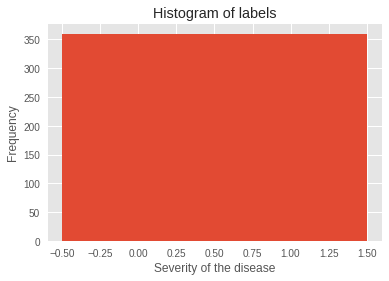

In [0]:
#plot histogram
labels = heartDisease['heartdisease']
plt.hist(labels, bins = [-0.5, 0.5, 1.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
show()

In [0]:
#do the same for Cleveland dataset only
#change to binary classification
for i in range(1,5):
    ClevelandHeartDisease['heartdisease'] =  ClevelandHeartDisease['heartdisease'].replace(i,1)

###Normalization

---
From the graph below, you can see that the data isn't normalized yet.
<br>Normalization can help improve accuracy of model, so we normalize all of the features to be in the range 0 and 1.


In [0]:
#plot graph before normalize
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

In [0]:
#normalize process

#converts everything to floats
for item in heartDisease:
    heartDisease[item] = pd.to_numeric(heartDisease[item])
#define function for normalization
def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
#define column to normalize
toNormalize = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak'] 

#normalize data
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna() #remove record that still has na value

In [0]:
#plot graph after normalize
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

In [0]:
#do the same for Cleveland dataset only
#converts everything to floats
for item in ClevelandHeartDisease:
    ClevelandHeartDisease[item] = pd.to_numeric(ClevelandHeartDisease[item])
#define function for normalization
def normalize(ClevelandHeartDisease, toNormalize): #normalizes 
    result = ClevelandHeartDisease.copy()
    for item in ClevelandHeartDisease.columns:
        if (item in toNormalize):
            max_value = ClevelandHeartDisease[item].max()
            min_value = ClevelandHeartDisease[item].min()
            result[item] = (ClevelandHeartDisease[item] - min_value) / (max_value - min_value)
    return result
#define column to normalize
toNormalize = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak'] 

#normalize data
ClevelandHeartDisease = normalize(ClevelandHeartDisease, toNormalize)
ClevelandHeartDisease = ClevelandHeartDisease.dropna() #remove record that still has na value

###Seperating Data

---
We begin with seperating all of the data into 3 sets.
<br> 50 % of the original data will be treated as a Training Set.
<br> 25 % of the original data will be treated as a Validation Set.
<br> 25 % of the original data will be treated as a Test Set.


In [0]:
#Seperating data for entire dataframe
##sepearate test set from training and validation set
trainandval, test = train_test_split(heartDisease, test_size = 0.25, random_state = 42)
trainandval_set = trainandval.ix[:, trainandval.columns != 'heartdisease']
trainandval_class_set = trainandval.ix[:, trainandval.columns == 'heartdisease']
##make training set
train, val = train_test_split(trainandval, test_size = 0.33, random_state = 42)
train_set = train.ix[:, train.columns != 'heartdisease'] #training feature
train_class_set = train.ix[:, train.columns == 'heartdisease'] #training label
##make validation set
val_set = val.ix[:, val.columns != 'heartdisease'] #validation feature
val_class_set = val.ix[:, val.columns == 'heartdisease'] #validation label
##make test set
test_set = test.ix[:, test.columns != 'heartdisease'] #test feature
test_class_set = test.ix[:, test.columns == 'heartdisease'] #test label

##onehot code labels
onehot_train_class_set = to_categorical(train_class_set)
onehot_val_class_set = to_categorical(val_class_set)
onehot_test_class_set = to_categorical(test_class_set)
onehot_trainandval_class_set = to_categorical(trainandval_class_set)

In [0]:
#print check
print("From entire datafram ", len(heartDisease), " records")
print("Training set: ",len(train_set),"records (", len(train_set)/len(heartDisease)*100, "%)")
print("Validation set: ",len(val_set),"records (", len(val_set)/len(heartDisease)*100, "%)")
print("Training set: ",len(test_set),"records (", len(test_set)/len(heartDisease)*100, "%)")

From entire datafram  720  records
Training set:  361 records ( 50.138888888888886 %)
Validation set:  179 records ( 24.86111111111111 %)
Training set:  180 records ( 25.0 %)


In [0]:
#do the same for Cleveland dataset
##sepearate test set from training and validation set
cl_trainandval, cl_test = train_test_split(ClevelandHeartDisease, test_size = 0.25, random_state = 42)
cl_trainandval_set = cl_trainandval.ix[:, cl_trainandval.columns != 'heartdisease']
cl_trainandval_class_set = cl_trainandval.ix[:, cl_trainandval.columns == 'heartdisease']
##make training set
cl_train, cl_val = train_test_split(cl_trainandval, test_size = 0.33, random_state = 42)
cl_train_set = cl_train.ix[:, cl_train.columns != 'heartdisease'] #training feature
cl_train_class_set = cl_train.ix[:, cl_train.columns == 'heartdisease'] #training label
##make validation set
cl_val_set = cl_val.ix[:, cl_val.columns != 'heartdisease'] #validation feature
cl_val_class_set = cl_val.ix[:, cl_val.columns == 'heartdisease'] #validation label
##make test set
cl_test_set = cl_test.ix[:, cl_test.columns != 'heartdisease'] #test feature
cl_test_class_set = cl_test.ix[:, cl_test.columns == 'heartdisease'] #test label

##onehot code labels
onehot_cl_train_class_set = to_categorical(cl_train_class_set)
onehot_cl_val_class_set = to_categorical(cl_val_class_set)
onehot_cl_test_class_set = to_categorical(cl_test_class_set)
onehot_cl_trainandval_class_set = to_categorical(cl_trainandval_class_set)

###Features Selection


---

To improve our model, we perform Gini coeeficient and Correlation coefficient to select only important features to be used to build a model. 
<br>We drop features that might have a linear relation with the class label or with other features, which are considered less important. 

####Gini Coefficient
Gini coefficient is a statistical measure of the degree of variation represented in a set of values. We use it to see the important level of each feature.
<br> To find Gini coefficeint, we perform Random Forest Model first to have a prediction value compared to an actual value. (We tried a lot of models and saw that Random Forest have the most accuracy value, so we use it to find Gini coefficient.)

In [0]:
#import Random Forest model
fitRF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
#train Random Forest model
fitRF.fit(train_set, train_class_set['heartdisease'])
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
#calculate gini coefficient
importancesRF = fitRF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRFnamesInd = names[:11]
namesInd = names[:11]

In [0]:
#print out
print("Feature ranking:")
for f in range(10):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, 
                                                                namesInd[indicesRF[i]], 
                                                                importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'chol' has a Gini Importance of 0.235989
2. The feature 'cp' has a Gini Importance of 0.179694
3. The feature 'age' has a Gini Importance of 0.101517
4. The feature 'thalach' has a Gini Importance of 0.100050
5. The feature 'oldpeak' has a Gini Importance of 0.099484
6. The feature 'exang' has a Gini Importance of 0.097723
7. The feature 'trestbps' has a Gini Importance of 0.088416
8. The feature 'sex' has a Gini Importance of 0.062708
9. The feature 'restecg' has a Gini Importance of 0.024324
10. The feature 'fbs' has a Gini Importance of 0.010094


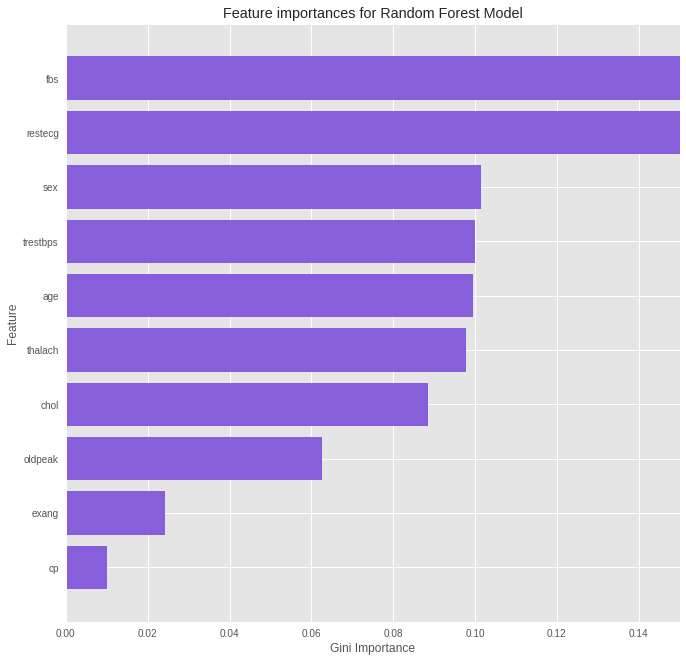

In [0]:
#plot graph
indRf = sorted(importancesRF) #sort into decreasing order 
index = np.arange(10) #arrange the importance

f, ax = plt.subplots(figsize=(11, 11))

plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')
plt.yticks(index, ('cp', 'exang', 'oldpeak', 'chol', 'thalach', 'age', 'trestbps', 'sex', 'restecg', 'fbs'))
plt.ylim(-1, 10)
plt.xlim(0, 0.15)
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

plt.show()

In [0]:
#predict Random Forest Model 
predictions_RF = fitRF.predict(test_set)
#print confusion matrix
print(pd.crosstab(predictions_RF, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))
#find accuracy
accuracy_RF = fitRF.score(test_set, test_class_set['heartdisease'])
print("Mean accuracy on the test set is: ",'%.3f' % (accuracy_RF * 100), '%')
#find error rate
test_error_rate_RF = 1 - accuracy_RF
print("The test error rate for model is: ",'%.3f' % (test_error_rate_RF * 100), '%')

Actual Values      0   1
Predicted Values        
0                 76  18
1                 15  71
Mean accuracy on the test set is:  81.667 %
The test error rate for model is:  18.333 %


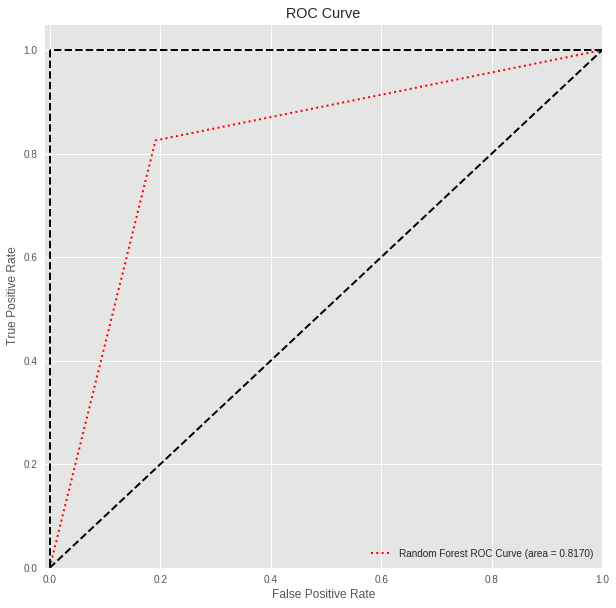

In [0]:
#find ROC curve
#ROC curve calculation
fpr1, tpr1, _ = roc_curve(predictions_RF, test_class_set)
#AUC curve calcuation
auc_rf = auc(fpr1, tpr1)
#plot graph
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr1, tpr1,label='Random Forest ROC Curve (area = %.4f)' % auc_rf, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

####Correlation Coefficient
Correlation coefficient is a number between +1 and −1 calculated as to represent the linear interdependence of two variables or sets of data.
<br>We use it to see a linear relation between features and to classify labels. We will remove some features that have a direct relation to improve an accuracy.

In [0]:
#define name column
coefname = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'heartdisease']
#generate dataframe of correlation coefficient
coef = corrcoef([np.asarray(heartDisease['age']),
         np.asarray(heartDisease['sex']),
         np.asarray(heartDisease['cp']),
         np.asarray(heartDisease['trestbps']),
         np.asarray(heartDisease['chol']),
         np.asarray(heartDisease['fbs']),
         np.asarray(heartDisease['restecg']),
         np.asarray(heartDisease['thalach']),
         np.asarray(heartDisease['exang']),
         np.asarray(heartDisease['oldpeak']),
         np.asarray(heartDisease['heartdisease']),
         ])
df = pd.DataFrame(coef)
df.columns = coefname
#printout
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,1.000000,-0.026807,0.159796,0.251146,-0.090822,0.151438,0.234541,-0.333228,0.136617,0.220491,0.242786
1,-0.026807,1.000000,0.154897,-0.009090,-0.196348,0.024311,-0.047361,-0.145654,0.155223,0.065517,0.297230
2,0.159796,0.154897,1.000000,0.005139,-0.166653,-0.012503,0.017335,-0.340494,0.421576,0.237809,0.496977
3,0.251146,-0.009090,0.005139,1.000000,0.077528,0.130709,0.095519,-0.116144,0.129852,0.164330,0.101922
4,-0.090822,-0.196348,-0.166653,0.077528,1.000000,0.099512,0.143714,0.260146,-0.033209,0.089224,-0.276371
5,0.151438,0.024311,-0.012503,0.130709,0.099512,1.000000,0.114526,0.030066,0.044384,0.056310,0.046881
6,0.234541,-0.047361,0.017335,0.095519,0.143714,0.114526,1.000000,0.082454,0.034854,0.149793,0.066747
7,-0.333228,-0.145654,-0.340494,-0.116144,0.260146,0.030066,0.082454,1.000000,-0.357369,-0.149809,-0.403744
8,0.136617,0.155223,0.421576,0.129852,-0.033209,0.044384,0.034854,-0.357369,1.000000,0.370037,0.458673
9,0.220491,0.065517,0.237809,0.164330,0.089224,0.056310,0.149793,-0.149809,0.370037,1.000000,0.370244


####Selected Features
So, after comparing both method and performing a few experiments, we selected to use only these 6 features.

1.   fbs
2.   restecg
3.   sex
4.   trestbps
5.   exang
6.   cp





##3.5 Experiments

###Experiment 1: Simple model with only data from Cleveland

In [0]:
# Build the model
model = models.Sequential()
model.add(Dropout(0.3, input_shape=(10,)))
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total para

In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [0]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(cl_train_set, onehot_cl_train_class_set, 
                    epochs = 50, 
                    batch_size = 16, 
                    verbose = 0,
                    validation_data = (cl_val_set, onehot_cl_val_class_set))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 2.00 seconds


In [0]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

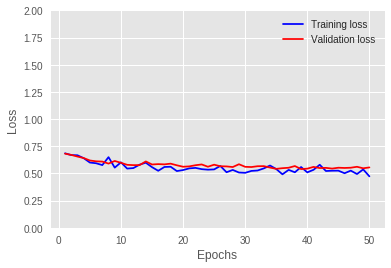

In [0]:
# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

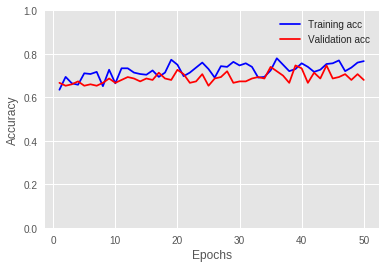

In [0]:
# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [0]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(cl_val_set)
y_pred = argmax(val_predicts, axis = 1)
cm = confusion_matrix(cl_val_class_set, y_pred)

In [0]:
# Accuracy can be calculated from the confusion matrix by
# counting all elements in diagonal (=trace of the matrix)
print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
print('Confusion matrix:')
print(cm)

Total accuracy: 0.6800
Confusion matrix:
[[26 16]
 [ 8 25]]


In [0]:
# Calculate precision, recall, fscore and support
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(cl_val_class_set, y_pred)

In [0]:
# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support: ', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:  [42 33]
Precision: [ 0.765  0.610]
Recall:    [ 0.619  0.758]
F-score:   [ 0.684  0.676]


**Experiment 1 result**
<br>Total accuracy: 0.7467
<br>Confusion matrix:
<br>[[32 10] 
<br>[ 9 24]]
<br>Support: [42 33]
<br>Precision: [ 0.780  0.706]
<br>Recall:    [ 0.762  0.727]
<br>F-score:   [ 0.771  0.716]

###Experiment 2: Simple model with only data from Cleveland (using regularization)

In [0]:
# Build the model
model = models.Sequential()
model.add(Dropout(0.3, input_shape=(10,)))
model.add(layers.Dense(10, activation='relu', activity_regularizer=l1(0.1), input_shape=(10,)))
model.add(layers.Dense(50, activation='relu', activity_regularizer=l1(0.1), input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', activity_regularizer=l1(0.1), input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', activity_regularizer=l1(0.1), input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', activity_regularizer=l1(0.1), input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 102       
Total para

In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [0]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(cl_train_set, onehot_cl_train_class_set, 
                    epochs = 500, 
                    batch_size = 16, 
                    verbose = 0,
                    validation_data = (cl_val_set, onehot_cl_val_class_set))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 8.63 seconds


In [0]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

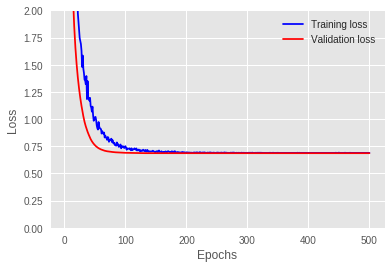

In [0]:
# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

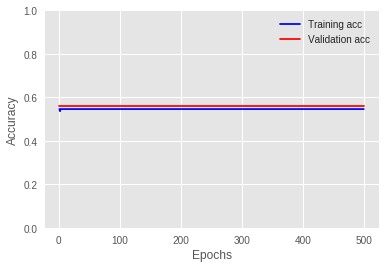

In [0]:
# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [0]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(cl_val_set)
y_pred = argmax(val_predicts, axis = 1)
cm = confusion_matrix(cl_val_class_set, y_pred)

In [0]:
# Accuracy can be calculated from the confusion matrix by
# counting all elements in diagonal (=trace of the matrix)
print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
print('Confusion matrix:')
print(cm)

Total accuracy: 0.5600
Confusion matrix:
[[42  0]
 [33  0]]


In [0]:
# Calculate precision, recall, fscore and support
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(cl_val_class_set, y_pred)

In [0]:
# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support: ', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:  [42 33]
Precision: [ 0.560  0.000]
Recall:    [ 1.000  0.000]
F-score:   [ 0.718  0.000]


**Experiment 2 result**
<br>Total accuracy: 0.5600
<br>Confusion matrix:
<br>[[42 0] 
<br>[33 0]]
<br>Support: [42 33]
<br>Precision: [ 0.560  0.000]
<br>Recall:    [ 1.000  0.000]
<br>F-score:   [ 0.718  0.000]

###Experiment 3: Simple model with three datasources

In [0]:
# Build the model
model = models.Sequential()
model.add(Dropout(0.3, input_shape=(10,)))
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 102       
Total para

In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [0]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(train_set, onehot_train_class_set, 
                    epochs = 50, 
                    batch_size = 16, 
                    verbose = 0,
                    validation_data = (val_set, onehot_val_class_set))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 2.77 seconds


In [0]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

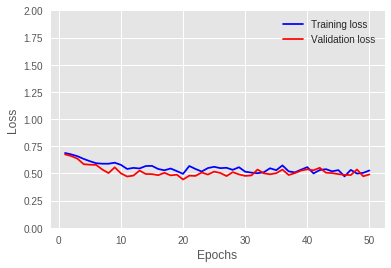

In [0]:
# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

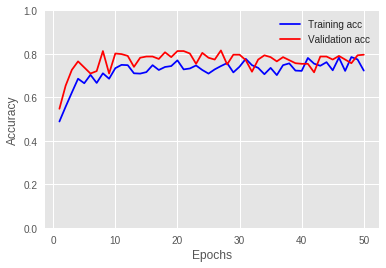

In [0]:
# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [0]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(val_set)
y_pred = argmax(val_predicts, axis = 1)
cm = confusion_matrix(val_class_set, y_pred)

In [0]:
# Accuracy can be calculated from the confusion matrix by
# counting all elements in diagonal (=trace of the matrix)
print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
print('Confusion matrix:')
print(cm)

Total accuracy: 0.7933
Confusion matrix:
[[77  9]
 [28 65]]


In [0]:
# Calculate precision, recall, fscore and support
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(val_class_set, y_pred)

In [0]:
# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support: ', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:  [86 93]
Precision: [ 0.733  0.878]
Recall:    [ 0.895  0.699]
F-score:   [ 0.806  0.778]


**Experiment 3 result**
<br>Total accuracy: 0.8324
<br>Confusion matrix:
<br>[[75 11] 
<br>[ 19 74]]
<br>Support: [86 93]
<br>Precision: [ 0.798  0.871]
<br>Recall:    [ 0.872  0.796]
<br>F-score:   [ 0.833  0.831]

###Experiment 4: Cross validation model with three datasources

In [0]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 102       
Total params: 8,412
Trainable params: 8,412
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
# prepare cross validation
kfold = KFold(10, True, 1)

Fold number: 1
Elapsed time: 3.27 seconds


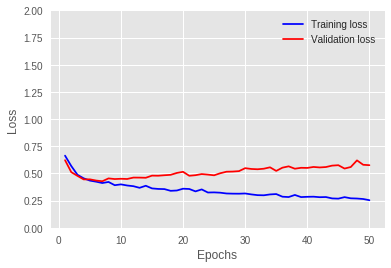

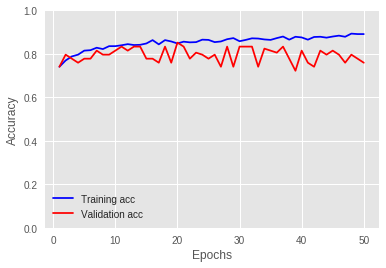

Total accuracy: 0.7593
Confusion matrix:
[[20  7]
 [ 6 21]]
--------------------- End fold number  1 --------------------


Fold number: 2
Elapsed time: 1.96 seconds


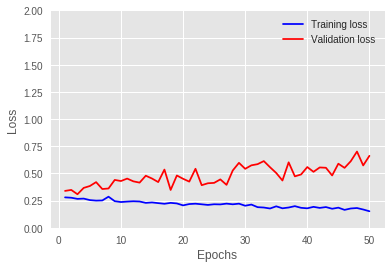

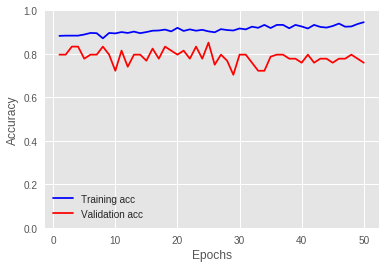

Total accuracy: 0.7593
Confusion matrix:
[[21  9]
 [ 4 20]]
--------------------- End fold number  2 --------------------


Fold number: 3
Elapsed time: 1.97 seconds


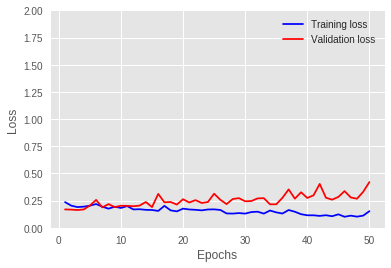

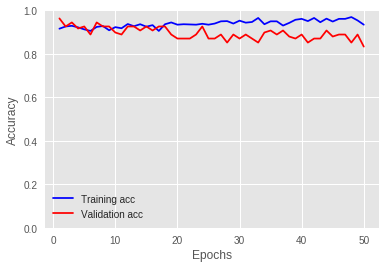

Total accuracy: 0.8333
Confusion matrix:
[[16  4]
 [ 5 29]]
--------------------- End fold number  3 --------------------


Fold number: 4
Elapsed time: 1.96 seconds


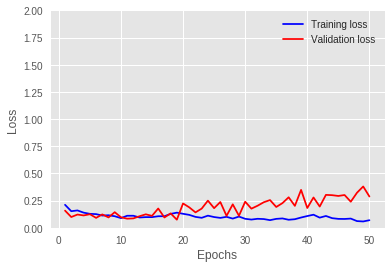

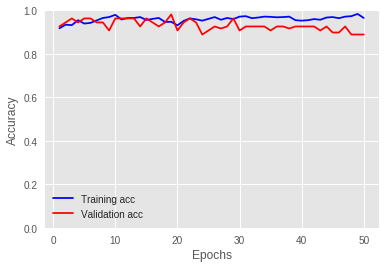

Total accuracy: 0.8889
Confusion matrix:
[[24  4]
 [ 2 24]]
--------------------- End fold number  4 --------------------


Fold number: 5
Elapsed time: 1.97 seconds


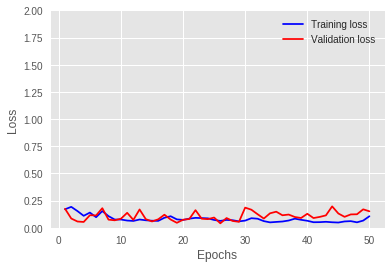

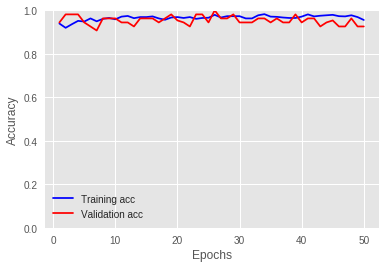

Total accuracy: 0.9259
Confusion matrix:
[[23  1]
 [ 3 27]]
--------------------- End fold number  5 --------------------


Fold number: 6
Elapsed time: 1.98 seconds


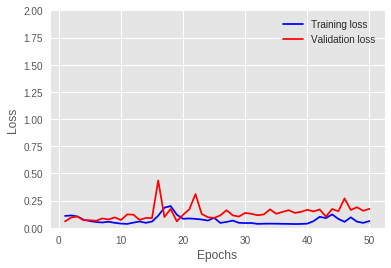

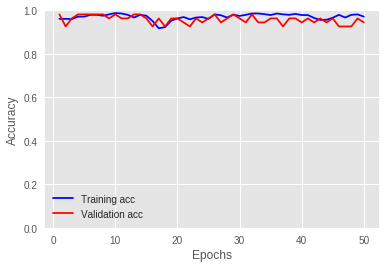

Total accuracy: 0.9444
Confusion matrix:
[[27  2]
 [ 1 24]]
--------------------- End fold number  6 --------------------


Fold number: 7
Elapsed time: 1.98 seconds


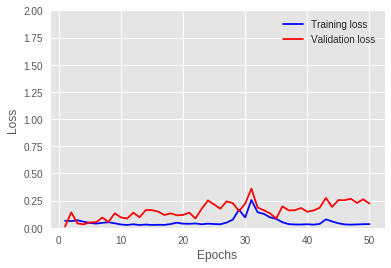

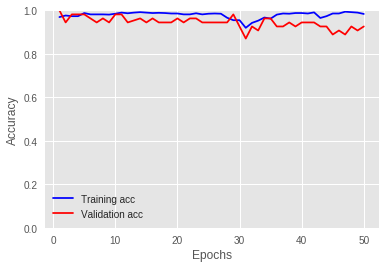

Total accuracy: 0.9259
Confusion matrix:
[[25  2]
 [ 2 25]]
--------------------- End fold number  7 --------------------


Fold number: 8
Elapsed time: 1.98 seconds


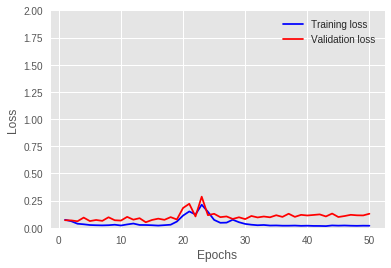

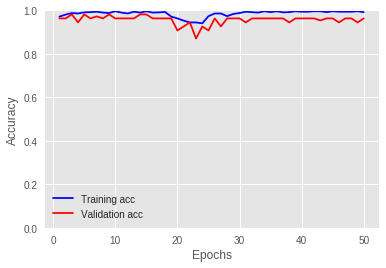

Total accuracy: 0.9630
Confusion matrix:
[[31  0]
 [ 2 21]]
--------------------- End fold number  8 --------------------


Fold number: 9
Elapsed time: 1.98 seconds


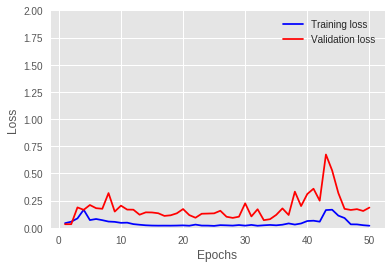

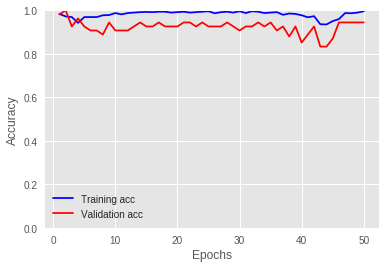

Total accuracy: 0.9444
Confusion matrix:
[[23  2]
 [ 1 28]]
--------------------- End fold number  9 --------------------


Fold number: 10
Elapsed time: 1.98 seconds


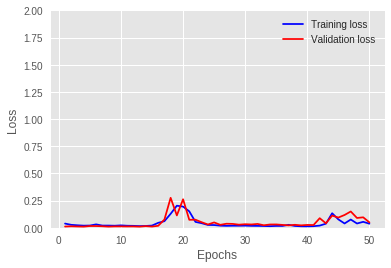

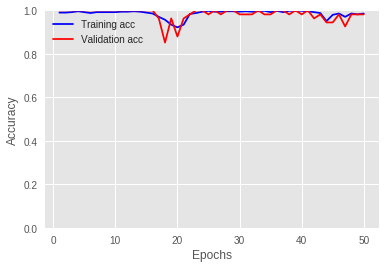

Total accuracy: 0.9815
Confusion matrix:
[[28  0]
 [ 1 25]]
--------------------- End fold number  10 --------------------




In [0]:
# data sample
data = array(trainandval)
loopnumber = 1 #for display fold number
crossval_accu = [] #for calculate average accuracy
# enumerate splits
for train, val in kfold.split(data):
  print("Fold number:",loopnumber)
  
  
  #Training Set
  train_cv = data[train] #training set after split
  #seperate label from features
  train_cv_set = [] #variable for features
  train_cv_class_set = [] #variable for label
  #loop append
  for i in range (len(data[train])):
    train_cv_set.append(train_cv[i][:10])
    train_cv_class_set.append(train_cv[i][10])
  #make np array
  train_cv_set = np.asarray(train_cv_set)
  train_cv_class_set = np.asarray(train_cv_class_set)
  
  
  #Validation Set
  val_cv = data[val]
  #seperate label from features
  val_cv_set = []
  val_cv_class_set = []
  #loop append
  for i in range (len(data[val])):
    val_cv_set.append(val_cv[i][:10])
    val_cv_class_set.append(val_cv[i][10])
  #make np array
  val_cv_set = np.asarray(val_cv_set)
  val_cv_class_set = np.asarray(val_cv_class_set)
    
    
  #make onehot labels to categorical output
  onehot_train_cv_class_set = to_categorical(train_cv_class_set)
  onehot_val_cv_class_set = to_categorical(val_cv_class_set)

  
  #train model
  t_start = time.time()
  history = model.fit(train_cv_set, onehot_train_cv_class_set, 
                      epochs = 50, 
                      batch_size = 16, 
                      verbose = 0,
                      validation_data = (val_cv_set, onehot_val_cv_class_set))
  t_end = time.time()
  print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))
  
  
  # Get the training data
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  epochs = range(1, len(loss_values) + 1)
  
  
  # Visualize the training process: loss function
  plt.figure()
  plt.plot(epochs, loss_values, 'b', label='Training loss')
  plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim([0, 2])
  plt.legend()
  plt.show()
  
  
  # Visualize the accuracy
  plt.figure()
  plt.plot(epochs, acc_values, 'b', label='Training acc')
  plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()
  
  
  # Print total accuracy and confusion matrix
  val_predicts = model.predict(val_cv_set)
  y_pred = argmax(val_predicts, axis = 1)
  cm = confusion_matrix(val_cv_class_set, y_pred)
  
  
  # Accuracy can be calculated from the confusion matrix by
  # counting all elements in diagonal (=trace of the matrix)
  print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
  crossval_accu.append(np.trace(cm)/sum(cm))
  print('Confusion matrix:')
  print(cm)
  
  
  print("--------------------- End fold number ",loopnumber,"--------------------")
  print("")
  print("")
  loopnumber += 1    

In [0]:
#Calculate average accuracy
print("All accuracy for each fold are:",crossval_accu)
sumaccucv = 0
for i in range (len(crossval_accu)):
  sumaccucv += crossval_accu[i]
sumaccucv = sumaccucv/(len(crossval_accu))
print("Accuracy avg is ",sumaccucv)

All accuracy for each fold are: [0.7592592592592593, 0.7592592592592593, 0.8333333333333334, 0.8888888888888888, 0.9259259259259259, 0.9444444444444444, 0.9259259259259259, 0.9629629629629629, 0.9444444444444444, 0.9814814814814815]
Accuracy avg is  0.8925925925925926


**Experiment 4 result**
<br>Total accuracy: 0.9111

###Experiment 5: Cross validation model with three datasources (only selected features)

**Selected Features**
<br>We selected features based on Gini coefficient and Correlation coefficient. 
1.   fbs
2.   restecg
3.   sex
4.   trestbps
5.   exang
6.   cp

In [0]:
#delete features
trainandval_edit = trainandval.copy()
del trainandval_edit['age']
del trainandval_edit['chol']
del trainandval_edit['thalach']
del trainandval_edit['oldpeak']
# del trainandval_edit['fbs']
# del trainandval_edit['restecg']
# del trainandval_edit['trestbps']

len_features = len(trainandval_edit.columns)-1

In [0]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(len_features,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_26 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 102       
Total params: 8,372
Trainable params: 8,372
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
# prepare cross validation
kfold = KFold(10, True, 1)

Fold number: 1
Elapsed time: 3.42 seconds


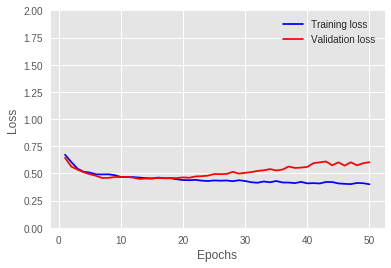

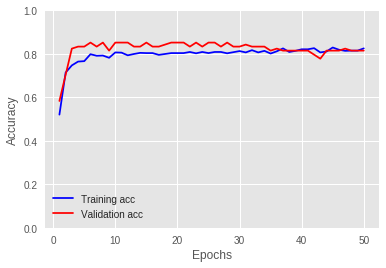

Total accuracy: 0.8148
Confusion matrix:
[[21  6]
 [ 4 23]]
--------------------- End fold number  1 --------------------


Fold number: 2
Elapsed time: 2.01 seconds


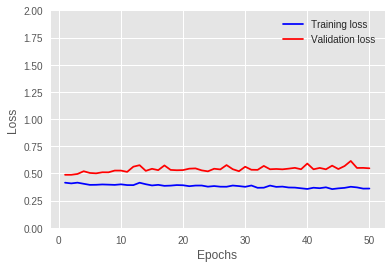

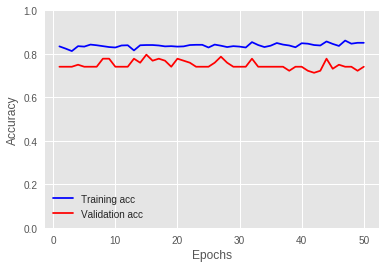

Total accuracy: 0.7407
Confusion matrix:
[[21  9]
 [ 5 19]]
--------------------- End fold number  2 --------------------


Fold number: 3
Elapsed time: 2.02 seconds


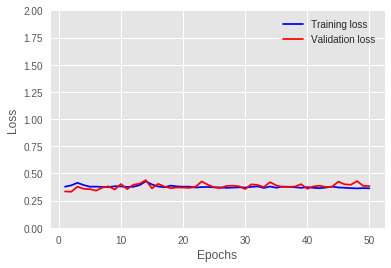

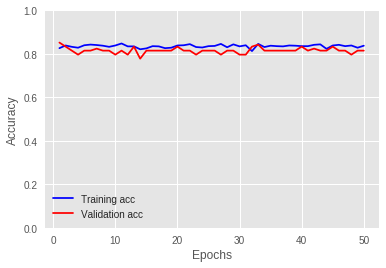

Total accuracy: 0.8148
Confusion matrix:
[[15  5]
 [ 5 29]]
--------------------- End fold number  3 --------------------


Fold number: 4
Elapsed time: 2.02 seconds


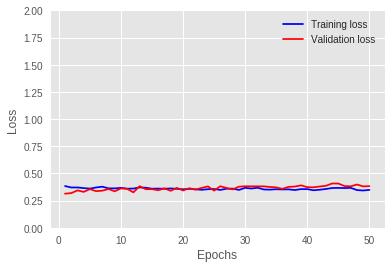

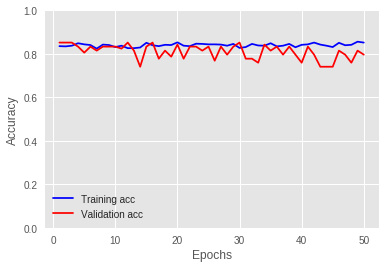

Total accuracy: 0.7963
Confusion matrix:
[[23  5]
 [ 6 20]]
--------------------- End fold number  4 --------------------


Fold number: 5
Elapsed time: 2.04 seconds


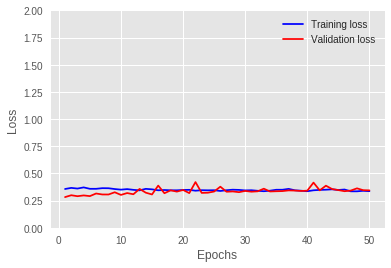

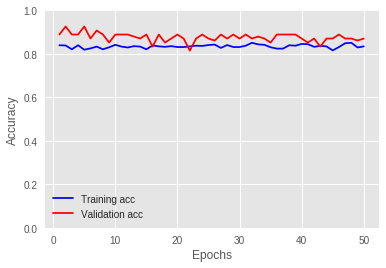

Total accuracy: 0.8704
Confusion matrix:
[[21  3]
 [ 4 26]]
--------------------- End fold number  5 --------------------


Fold number: 6
Elapsed time: 2.02 seconds


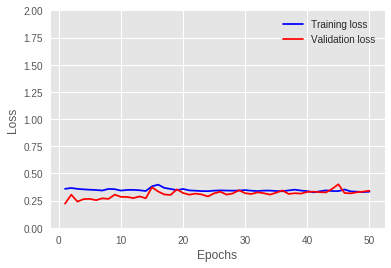

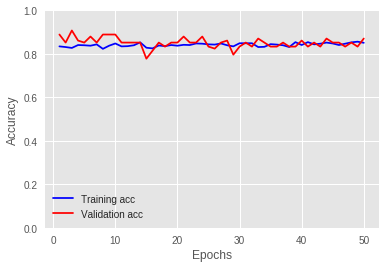

Total accuracy: 0.8704
Confusion matrix:
[[25  4]
 [ 3 22]]
--------------------- End fold number  6 --------------------


Fold number: 7
Elapsed time: 2.01 seconds


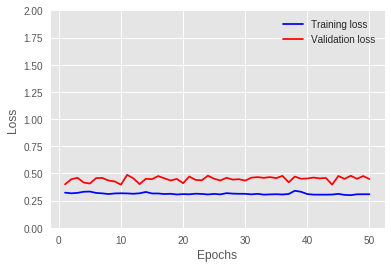

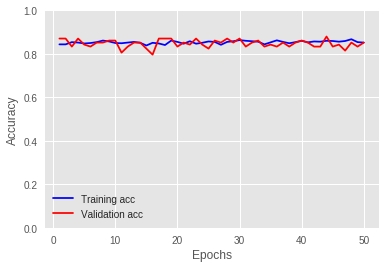

Total accuracy: 0.8519
Confusion matrix:
[[23  4]
 [ 4 23]]
--------------------- End fold number  7 --------------------


Fold number: 8
Elapsed time: 2.03 seconds


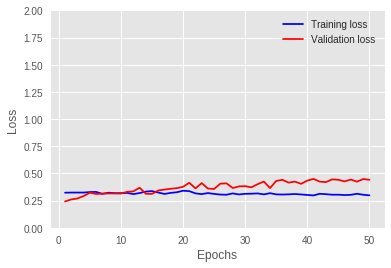

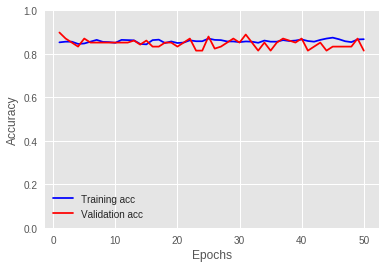

Total accuracy: 0.8148
Confusion matrix:
[[23  8]
 [ 2 21]]
--------------------- End fold number  8 --------------------


Fold number: 9
Elapsed time: 2.02 seconds


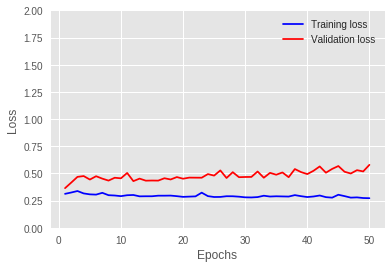

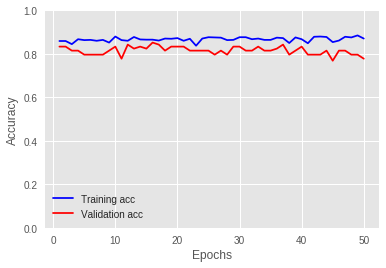

Total accuracy: 0.7778
Confusion matrix:
[[18  7]
 [ 5 24]]
--------------------- End fold number  9 --------------------


Fold number: 10
Elapsed time: 2.02 seconds


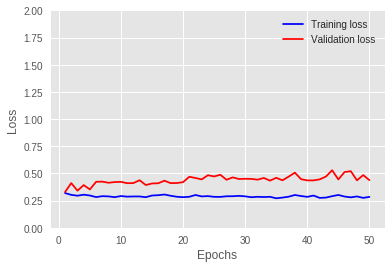

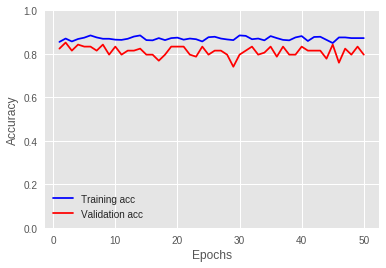

Total accuracy: 0.7963
Confusion matrix:
[[24  4]
 [ 7 19]]
--------------------- End fold number  10 --------------------




In [0]:
# data sample
data = array(trainandval_edit)
loopnumber = 1 #for display fold number
crossval_accu = [] #for calculate average accuracy
# enumerate splits
for train, val in kfold.split(data):
  print("Fold number:",loopnumber)
  
  
  #Training Set
  train_cv = data[train] #training set after split
  #seperate label from features
  train_cv_set = [] #variable for features
  train_cv_class_set = [] #variable for label
  #loop append
  for i in range (len(data[train])):
    train_cv_set.append(train_cv[i][:len_features])
    train_cv_class_set.append(train_cv[i][len_features])
  #make np array
  train_cv_set = np.asarray(train_cv_set)
  train_cv_class_set = np.asarray(train_cv_class_set)
  
  
  #Validation Set
  val_cv = data[val]
  #seperate label from features
  val_cv_set = []
  val_cv_class_set = []
  #loop append
  for i in range (len(data[val])):
    val_cv_set.append(val_cv[i][:len_features])
    val_cv_class_set.append(val_cv[i][len_features])
  #make np array
  val_cv_set = np.asarray(val_cv_set)
  val_cv_class_set = np.asarray(val_cv_class_set)
    
    
  #make onehot labels to categorical output
  onehot_train_cv_class_set = to_categorical(train_cv_class_set)
  onehot_val_cv_class_set = to_categorical(val_cv_class_set)

  
  #train model
  t_start = time.time()
  history = model.fit(train_cv_set, onehot_train_cv_class_set, 
                      epochs = 50, 
                      batch_size = 16, 
                      verbose = 0,
                      validation_data = (val_cv_set, onehot_val_cv_class_set))
  t_end = time.time()
  print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))
  
  
  # Get the training data
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  epochs = range(1, len(loss_values) + 1)
  
  
  # Visualize the training process: loss function
  plt.figure()
  plt.plot(epochs, loss_values, 'b', label='Training loss')
  plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim([0, 2])
  plt.legend()
  plt.show()
  
  
  # Visualize the accuracy
  plt.figure()
  plt.plot(epochs, acc_values, 'b', label='Training acc')
  plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()
  
  
  # Print total accuracy and confusion matrix
  val_predicts = model.predict(val_cv_set)
  y_pred = argmax(val_predicts, axis = 1)
  cm = confusion_matrix(val_cv_class_set, y_pred)
  
  
  # Accuracy can be calculated from the confusion matrix by
  # counting all elements in diagonal (=trace of the matrix)
  print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
  crossval_accu.append(np.trace(cm)/sum(cm))
  print('Confusion matrix:')
  print(cm)
  
  
  print("--------------------- End fold number ",loopnumber,"--------------------")
  print("")
  print("")
  loopnumber += 1    

In [0]:
#Calculate average accuracy
print("All accuracy for each fold are:",crossval_accu)
sumaccucv = 0
for i in range (len(crossval_accu)):
  sumaccucv += crossval_accu[i]
sumaccucv = sumaccucv/(len(crossval_accu))
print("Accuracy avg is ",sumaccucv)

All accuracy for each fold are: [0.8148148148148148, 0.7407407407407407, 0.8148148148148148, 0.7962962962962963, 0.8703703703703703, 0.8703703703703703, 0.8518518518518519, 0.8148148148148148, 0.7777777777777778, 0.7962962962962963]
Accuracy avg is  0.8148148148148149


**Experiment 5 result**
<br>Total accuracy: 0.8111

## 4. Modeling and compilation
After we done a lot of experiments, we decide to go with cross validation model with all of the features available since it give us the highest accuracy one.
*   Our model has 5 hidden layer, each layer has 50 neurons inside.
*   We use rectified linear unit (ReLU) as our activation fuction for hiddenlayer, and sigmoid activation function for output layer
*   We didn't set drop out and regularization function since it lower model accuracy too much.





In [0]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(50, activation='relu', input_shape=(50,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_33 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 102       
Total params: 8,412
Trainable params: 8,412
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
# prepare cross validation
kfold = KFold(10, True, 1)

In [0]:
# data sample
data = array(trainandval)
loopnumber = 1 #for display fold number
crossval_accu = [] #for calculate average accuracy

## 5. Training and Validation

For training and validation, we use trainandval dataframe feed to kfold split function to let algorithm split it for us. Then we loop train our model with each training set and validation set.
*   For optimizer, we use adam optimizer.
*   We set number of epochs to be 50, and batch size to be 16.
*   For number of fold in cross validation model, we use 10-fold cross validation.

Fold number: 1
Elapsed time: 3.59 seconds


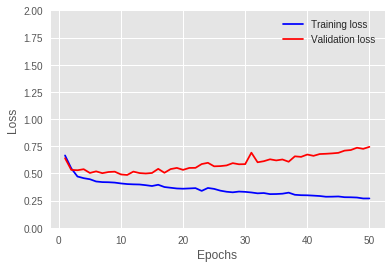

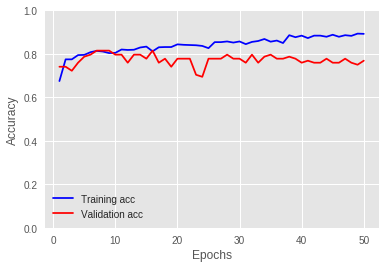

Total accuracy: 0.7778
Confusion matrix:
[[19  8]
 [ 4 23]]
--------------------- End fold number  1 --------------------


Fold number: 2
Elapsed time: 2.05 seconds


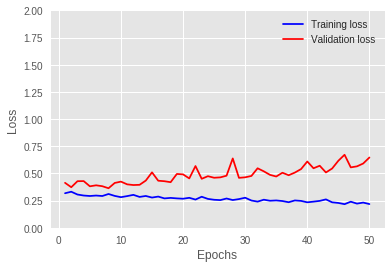

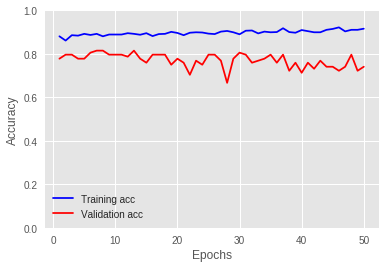

Total accuracy: 0.7407
Confusion matrix:
[[20 10]
 [ 4 20]]
--------------------- End fold number  2 --------------------


Fold number: 3
Elapsed time: 2.08 seconds


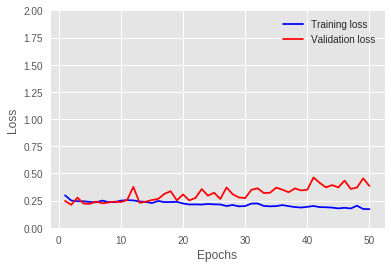

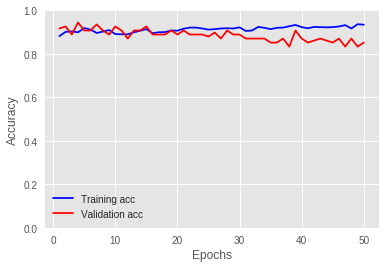

Total accuracy: 0.8519
Confusion matrix:
[[17  3]
 [ 5 29]]
--------------------- End fold number  3 --------------------


Fold number: 4
Elapsed time: 2.07 seconds


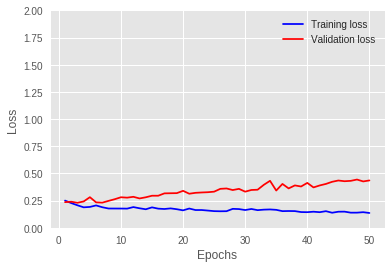

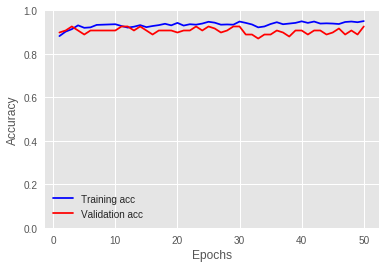

Total accuracy: 0.9259
Confusion matrix:
[[25  3]
 [ 1 25]]
--------------------- End fold number  4 --------------------


Fold number: 5
Elapsed time: 2.05 seconds


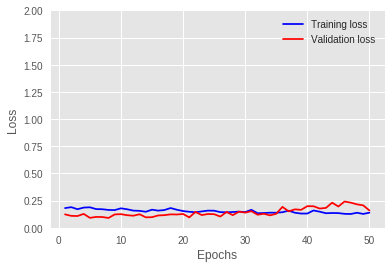

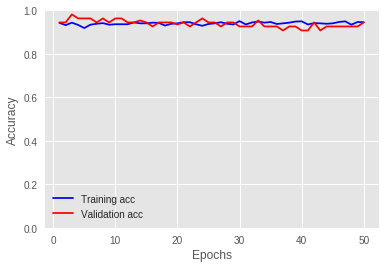

Total accuracy: 0.9444
Confusion matrix:
[[22  2]
 [ 1 29]]
--------------------- End fold number  5 --------------------


Fold number: 6
Elapsed time: 2.06 seconds


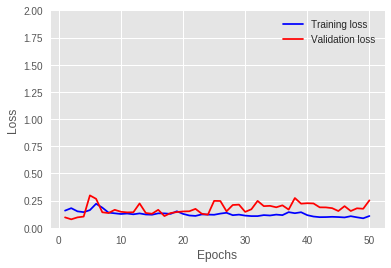

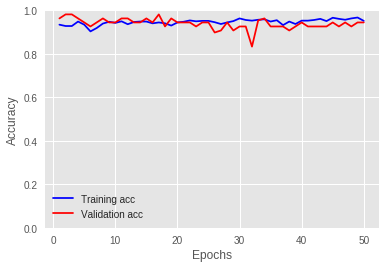

Total accuracy: 0.9444
Confusion matrix:
[[28  1]
 [ 2 23]]
--------------------- End fold number  6 --------------------


Fold number: 7
Elapsed time: 2.06 seconds


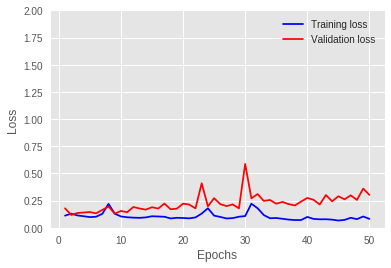

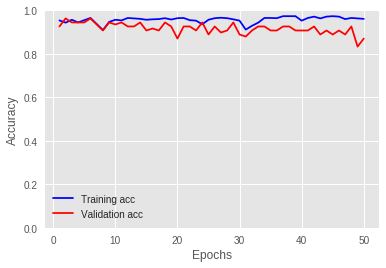

Total accuracy: 0.8704
Confusion matrix:
[[22  5]
 [ 2 25]]
--------------------- End fold number  7 --------------------


Fold number: 8
Elapsed time: 2.06 seconds


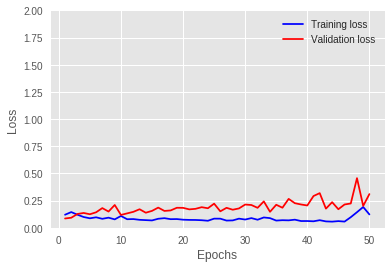

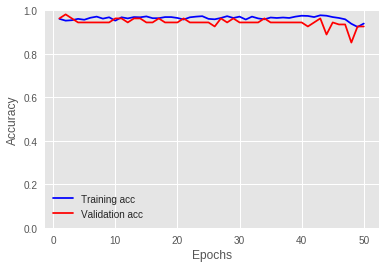

Total accuracy: 0.9259
Confusion matrix:
[[30  1]
 [ 3 20]]
--------------------- End fold number  8 --------------------


Fold number: 9
Elapsed time: 2.08 seconds


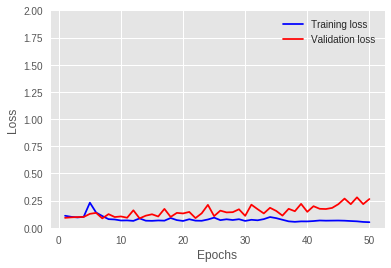

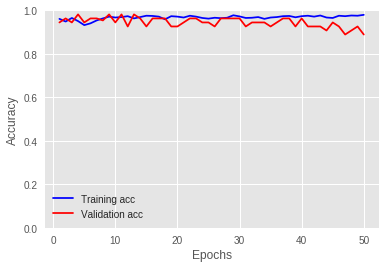

Total accuracy: 0.8889
Confusion matrix:
[[20  5]
 [ 1 28]]
--------------------- End fold number  9 --------------------


Fold number: 10
Elapsed time: 2.06 seconds


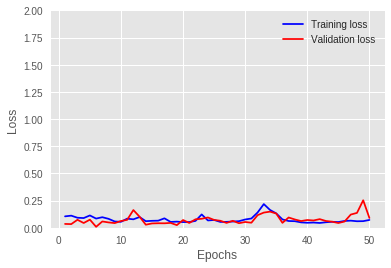

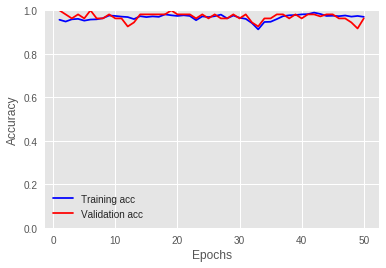

Total accuracy: 0.9630
Confusion matrix:
[[27  1]
 [ 1 25]]
--------------------- End fold number  10 --------------------




In [0]:
# enumerate splits
for train, val in kfold.split(data):
  print("Fold number:",loopnumber)
  
  
  #Training Set
  train_cv = data[train] #training set after split
  #seperate label from features
  train_cv_set = [] #variable for features
  train_cv_class_set = [] #variable for label
  #loop append
  for i in range (len(data[train])):
    train_cv_set.append(train_cv[i][:10])
    train_cv_class_set.append(train_cv[i][10])
  #make np array
  train_cv_set = np.asarray(train_cv_set)
  train_cv_class_set = np.asarray(train_cv_class_set)
  
  
  #Validation Set
  val_cv = data[val]
  #seperate label from features
  val_cv_set = []
  val_cv_class_set = []
  #loop append
  for i in range (len(data[val])):
    val_cv_set.append(val_cv[i][:10])
    val_cv_class_set.append(val_cv[i][10])
  #make np array
  val_cv_set = np.asarray(val_cv_set)
  val_cv_class_set = np.asarray(val_cv_class_set)
    
    
  #make onehot labels to categorical output
  onehot_train_cv_class_set = to_categorical(train_cv_class_set)
  onehot_val_cv_class_set = to_categorical(val_cv_class_set)

  
  #train model
  t_start = time.time()
  history = model.fit(train_cv_set, onehot_train_cv_class_set, 
                      epochs = 50, 
                      batch_size = 16, 
                      verbose = 0,
                      validation_data = (val_cv_set, onehot_val_cv_class_set))
  t_end = time.time()
  print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))
  
  
  # Get the training data
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  epochs = range(1, len(loss_values) + 1)
  
  
  # Visualize the training process: loss function
  plt.figure()
  plt.plot(epochs, loss_values, 'b', label='Training loss')
  plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim([0, 2])
  plt.legend()
  plt.show()
  
  
  # Visualize the accuracy
  plt.figure()
  plt.plot(epochs, acc_values, 'b', label='Training acc')
  plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()
  
  
  # Print total accuracy and confusion matrix
  val_predicts = model.predict(val_cv_set)
  y_pred = argmax(val_predicts, axis = 1)
  cm = confusion_matrix(val_cv_class_set, y_pred)
  
  
  # Accuracy can be calculated from the confusion matrix by
  # counting all elements in diagonal (=trace of the matrix)
  print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
  crossval_accu.append(np.trace(cm)/sum(cm))
  print('Confusion matrix:')
  print(cm)
  
  
  print("--------------------- End fold number ",loopnumber,"--------------------")
  print("")
  print("")
  loopnumber += 1    

In [0]:
#Calculate average accuracy
print("All accuracy for each fold are:",crossval_accu)
sumaccucv = 0
for i in range (len(crossval_accu)):
  sumaccucv += crossval_accu[i]
sumaccucv = sumaccucv/(len(crossval_accu))
print("Accuracy avg is ",sumaccucv)

All accuracy for each fold are: [0.7777777777777778, 0.7407407407407407, 0.8518518518518519, 0.9259259259259259, 0.9444444444444444, 0.9444444444444444, 0.8703703703703703, 0.9259259259259259, 0.8888888888888888, 0.9629629629629629]
Accuracy avg is  0.8833333333333334


**Training result**
<br>Total accuracy: 0.91296

## 6. Evaluation

After we selected model to use and train it, we then test it with test set which we never use it before in any process of experiments.

In [0]:
#evaluate model
score = model.evaluate(test_set, onehot_test_class_set, batch_size=16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

180/180 [==============================] - 0s 94us/step
Test loss: 1.4749384813838535
Test accuracy: 0.7722222222222223


In [0]:
# Print total accuracy and confusion matrix
val_predicts = model.predict(test_set)
y_pred = argmax(val_predicts, axis = 1)
cm = confusion_matrix(test_class_set, y_pred)

In [0]:
# Accuracy can be calculated from the confusion matrix by
# counting all elements in diagonal (=trace of the matrix)
print('Total accuracy: {:.4f}'.format(np.trace(cm)/sum(cm)))
print('Confusion matrix:')
print(cm)

Total accuracy: 0.7722
Confusion matrix:
[[69 22]
 [19 70]]


In [0]:
# Calculate precision, recall, fscore and support
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(test_class_set, y_pred)

In [0]:
# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support: ', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:  [91 89]
Precision: [ 0.784  0.761]
Recall:    [ 0.758  0.787]
F-score:   [ 0.771  0.773]


**Evaluation Result**

---


Finally, we have model with accuracy 0.7833
<br>with loss 1.667.
<br>
<br>Confusion matrix:
<br>[[74 17]
<br>[22 67]]
<br>
<br>Support:  [91 89]
<br>Precision: [ 0.771  0.798]
<br>Recall:    [ 0.813  0.753]
<br>F-score:   [ 0.791  0.775]

## 7. Results and Discussion

In this case study, we perform 5 experiments with different model architectures to see which model performs the best and what factors affect the accuracy of the model.
<br>
<br>Firstly, we try to build a simple model with only dataset from Cleveland Cilnic Foundation. And here is our result.
<br>**Experiment 1 Result**
<br>Total accuracy: 0.7467
<br>Confusion matrix:
<br>[[32 10] 
<br>[ 9 24]]
<br>Support: [42 33]
<br>Precision: [ 0.780  0.706]
<br>Recall:    [ 0.762  0.727]
<br>F-score:   [ 0.771  0.716]
<br>
<br>Secondly, we still use the same datasource to train a model but change the model architechture by adding new parameter and regularizer, to our model. Here is the result from experiment 2.
<br>**Experiment 2 Result**
<br>Total accuracy: 0.5600
<br>Confusion matrix:
<br>[[42 0] 
<br>[33 0]]
<br>Support: [42 33]
<br>Precision: [ 0.560  0.000]
<br>Recall:    [ 1.000  0.000]
<br>F-score:   [ 0.718  0.000]
<br>**Experiment 2 Discussion**
<br>We can see that adding a regularizer to the model doesn't help improve the model's accuracy at all. In fact, it messes up our model and causes it to be unable to detect the heart disease (many false negatives).
<br>
<br>Thirdly, we build the same model architecture as in experiment 1 but change the input data. We use two additional data from Switzerland University Hospital and Hungarian Institute of Cardiology. Here is the result from experiment 3.
<br>**Experiment 3 Result**
<br>Total accuracy: 0.8324
<br>Confusion matrix:
<br>[[75 11] 
<br>[ 19 74]]
<br>Support: [86 93]
<br>Precision: [ 0.798  0.871]
<br>Recall:    [ 0.872  0.796]
<br>F-score:   [ 0.833  0.831]
<br>**Experiment 3 Discussion**
<br>We can clearly see that adding more data to train model helps the model perform better.
<br>
<br>Fourthly, we use the three datasources to perform a cross-validation model. We use 10-fold validation as our method of experiment since many researches say that 10-fold is the best option.
<br>**Experiment 4 Result**
<br>Total accuracy: 0.9111
<br>**Experiment 4 Discussion**
<br>We can see that performing cross-validation help model perform much better since cross validation is a technique for assessing how the results of a statistical analysis will generalize to an independent dataset.
<br>
<br>Lastly, we use the same cross-validation architecture as in experiment 4 but reduce the features of the model. By doing feature selection, we selected only 6 features to train model since there too many missing fields in the removed features and hope that the model's accuracy will increase. The 6 features include fbs, restecg, sex, trestbps, exang, and cp.
<br>**Experiment 5 Result**
<br>Total accuracy: 0.8111
<br>**Experiment 5 Discussion**
<br>This experiment showed us that reducing the dimension of the training data may not help improve an accuracy of the model.

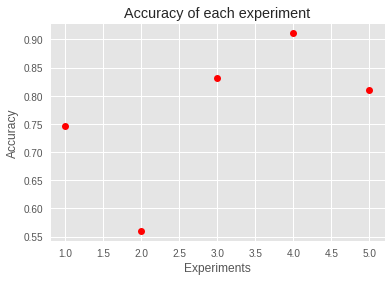

In [0]:
#plot graph
plt.plot([1,2,3,4,5],[0.7467,0.56,0.8324,0.9111,0.8111],'ro')
plt.xlabel('Experiments')
plt.ylabel('Accuracy')
plt.title('Accuracy from each experiment')
show()

Since the model in experiment 4 has the highest accuracy, we use it as our main model and test its accuracy with seperate test set. Here is the result.
<br>Model accuracy is 0.7833
<br>with loss 1.667.
<br>Confusion matrix:
<br>[[74 17]
<br>[22 67]]
<br>Support:  [91 89]
<br>Precision: [ 0.771  0.798]
<br>Recall:    [ 0.813  0.753]
<br>F-score:   [ 0.791  0.775]
<br>Compare to validation accuracy (0.9111), the accuracy from the test set is around 10 percent lower. We can guess that our model may not sensitive to the new data and there is a chance that overfitting ocurred during training process.

## 8. Conclusions

By messing around with data and applying different algorithms, we have so many tools at our hands that can predict the presence of disease in the future. Each model we have trained has its own strength and weakness, some models may produce high accuracy but also have high false positive or false negative value in the confusion matrix, which is not good as a model used to predict coronary heart disease. For this case study, we choose to only focus on an accuracy value. 

<br>We found out that using cross-validation with all 10 features has produced the best performances in validation accuracy score. It is reasonable since cross-validation makes sure that each record apart from test set will be iteratively used for both training process and validation process, which means that it will reduce the loss value by training itself and adjusting weights many times until the entired data, except the test set, has been used.

<br>However, when we calculate an accuracy again with the test set, we saw that the real accuracy value is far lower than an accuracy from the validation set. Therefore, this means our model isn't great with new unseen data and may have a chance to produce false positive and false negative more than we think. Our model may be overfitting with the training data.



---

